(stable)=
# Stable

Review today
- [Original](../../reviews/CLTX-25-LTE-0329_Proof_hi.pdf), [review](../../reviews/CLTX-25-LTE-0329_Proof_hi.md)
- [Letter](../../reviews/CLTX-25-ORIG-0267_Proof_hi.pdf), [review](../../reviews/CLTX-25-ORIG-0267_Proof_hi.md)

```{raw} html
<style>
.float-right {
    float: right;
    width: 35%;
    height: auto;
    margin-left: 15px;
    border: 1px solid #ccc;
    padding: 5px;
    background-color: #f9f9f9;
}

.float-right p {
    text-align: left;
    font-size: 12px;
}
</style>

<div class="float-right">
    <img src="https://cdn.theatlantic.com/thumbor/OvGN4MEDbgqaANUVZafxxp_QLwc=/0x0:2000x1125/1920x1080/media/img/2025/02/14/MurdochLeadRedoCrop/original.png" alt="Eco-Green QR Code" width="100%">
    <p>CG-BEST represents our Dionysian bequethal.</p>
</div>
```


<blockquote style="border-left: 2px solid black; padding-left: 1em; font-style: italic; background: none;">
    You, from crimes<br>
    Art, to enchant<br>
    Relieved, by prayer<br>
    Spirits, to enforce<br>
    Ending, in despair<br>
    — <a href="https://www.gutenberg.org/files/23042/23042-h/23042-h.htm" target="_blank" style="text-decoration: none; font-style: normal;">Prospero</a>
</blockquote>



```{raw} html
<style>
.float-right {
    float: right;
    width: 35%;
    height: auto;
    margin-left: 15px;
    border: 1px solid #ccc;
    padding: 5px;
    background-color: #f9f9f9;
}

.float-right p {
    text-align: left;
    font-size: 12px;
}
</style>

<div class="float-right">
    <img src="../../figures/daa.png" alt="Eco-Green QR Code" width="100%">
    <p>Dionysus as chaotic energy (static), Athena as the filtering force (temperament), and Apollo shaping the resulting harmony (jazz). Source: DALL-E</p>
</div>
```



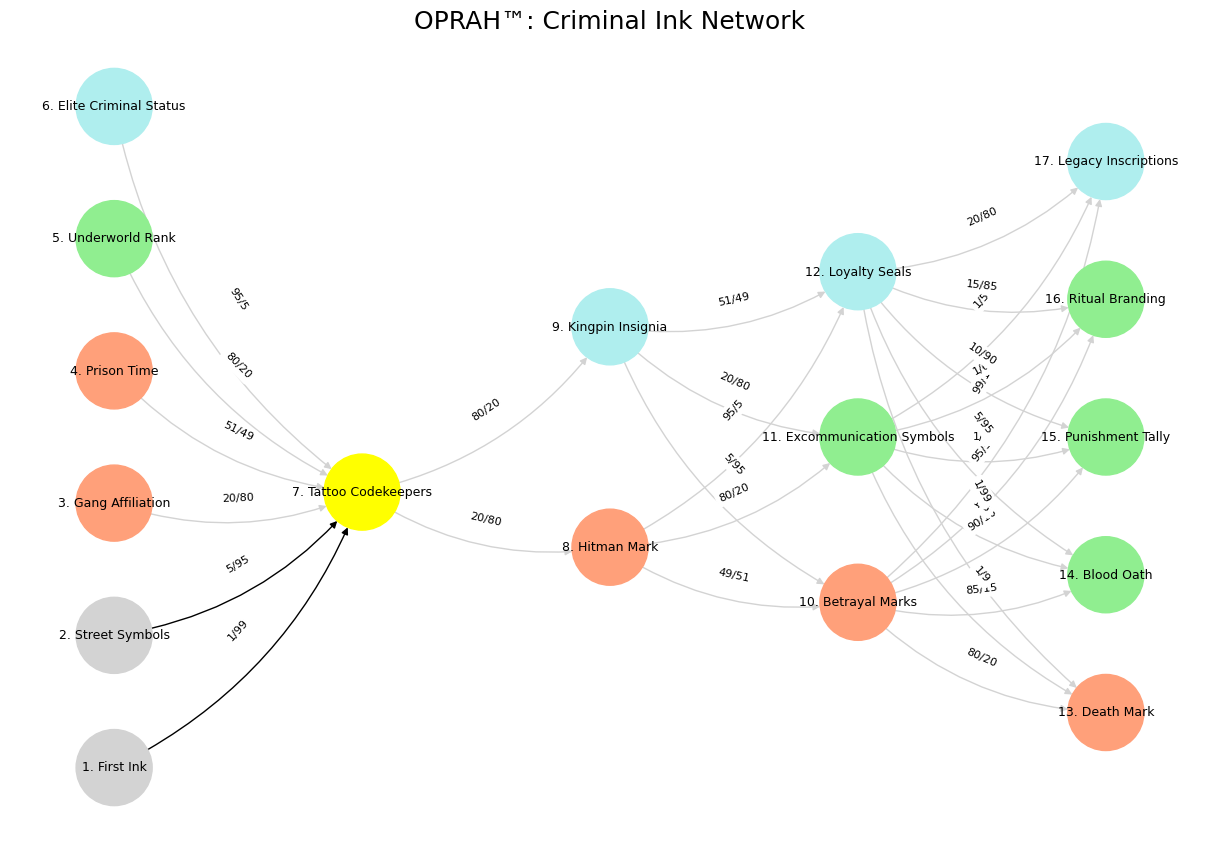

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the relabeled network layers with tattoo-world labels
def define_layers():
    return {
        'Initiation': ['First Ink', 'Street Symbols', 'Gang Affiliation', 'Prison Time', "Underworld Rank", 'Elite Criminal Status'],
        'Recognition': ['Tattoo Codekeepers'],  
        'Authority': ['Hitman Mark', 'Kingpin Insignia'],  
        'Regulation': ['Betrayal Marks', 'Excommunication Symbols', 'Loyalty Seals', ],  
        "Execution": ['Death Mark', 'Blood Oath', 'Punishment Tally', 'Ritual Branding', 'Legacy Inscriptions']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = {
        'yellow': ['Tattoo Codekeepers'],  
        'paleturquoise': ['Elite Criminal Status', 'Kingpin Insignia', 'Loyalty Seals', 'Legacy Inscriptions'],  
        'lightgreen': ["Underworld Rank", 'Excommunication Symbols', 'Blood Oath', 'Ritual Branding', 'Punishment Tally'],  
        'lightsalmon': ['Gang Affiliation', 'Prison Time', 'Hitman Mark', 'Betrayal Marks', 'Death Mark'],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Define edge weights
def define_edges():
    return {
        ('First Ink', 'Tattoo Codekeepers'): '1/99',
        ('Street Symbols', 'Tattoo Codekeepers'): '5/95',
        ('Gang Affiliation', 'Tattoo Codekeepers'): '20/80',
        ('Prison Time', 'Tattoo Codekeepers'): '51/49',
        ("Underworld Rank", 'Tattoo Codekeepers'): '80/20',
        ('Elite Criminal Status', 'Tattoo Codekeepers'): '95/5',
        ('Tattoo Codekeepers', 'Hitman Mark'): '20/80',
        ('Tattoo Codekeepers', 'Kingpin Insignia'): '80/20',
        ('Hitman Mark', 'Betrayal Marks'): '49/51',
        ('Hitman Mark', 'Excommunication Symbols'): '80/20',
        ('Hitman Mark', 'Loyalty Seals'): '95/5',
        ('Kingpin Insignia', 'Betrayal Marks'): '5/95',
        ('Kingpin Insignia', 'Excommunication Symbols'): '20/80',
        ('Kingpin Insignia', 'Loyalty Seals'): '51/49',
        ('Betrayal Marks', 'Death Mark'): '80/20',
        ('Betrayal Marks', 'Blood Oath'): '85/15',
        ('Betrayal Marks', 'Punishment Tally'): '90/10',
        ('Betrayal Marks', 'Ritual Branding'): '95/5',
        ('Betrayal Marks', 'Legacy Inscriptions'): '99/1',
        ('Excommunication Symbols', 'Death Mark'): '1/9',
        ('Excommunication Symbols', 'Blood Oath'): '1/8',
        ('Excommunication Symbols', 'Punishment Tally'): '1/7',
        ('Excommunication Symbols', 'Ritual Branding'): '1/6',
        ('Excommunication Symbols', 'Legacy Inscriptions'): '1/5',
        ('Loyalty Seals', 'Death Mark'): '1/99',
        ('Loyalty Seals', 'Blood Oath'): '5/95',
        ('Loyalty Seals', 'Punishment Tally'): '10/90',
        ('Loyalty Seals', 'Ritual Branding'): '15/85',
        ('Loyalty Seals', 'Legacy Inscriptions'): '20/80'
    }

# Define edges to be highlighted in black
def define_black_edges():
    return {
        ('First Ink', 'Tattoo Codekeepers'): '1/99',
        ('Street Symbols', 'Tattoo Codekeepers'): '5/95',
    }

# Calculate node positions
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    edges = define_edges()
    black_edges = define_black_edges()
    
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    
    # Create mapping from original node names to numbered labels
    mapping = {}
    counter = 1
    for layer in layers.values():
        for node in layer:
            mapping[node] = f"{counter}. {node}"
            counter += 1
            
    # Add nodes with new numbered labels and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            new_node = mapping[node]
            G.add_node(new_node, layer=layer_name)
            pos[new_node] = position
            node_colors.append(colors.get(node, 'lightgray'))
    
    # Add edges with updated node labels
    edge_colors = []
    for (source, target), weight in edges.items():
        if source in mapping and target in mapping:
            new_source = mapping[source]
            new_target = mapping[target]
            G.add_edge(new_source, new_target, weight=weight)
            edge_colors.append('black' if (source, target) in black_edges else 'lightgrey')
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    edges_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors,
        node_size=3000, font_size=9, connectionstyle="arc3,rad=0.2"
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_labels, font_size=8)
    plt.title("OPRAH™: Criminal Ink Network: Ukubona Ubuntu", fontsize=18)
    plt.show()

# Run the visualization
visualize_nn()


```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
Icarus represents a rapid, elegant escape from the labyrinth by transcending into the third dimension—a brilliant shortcut past the father’s meticulous, earthbound craftsmanship. Daedalus, the master architect, constructs a tortuous, enclosed structure that forces problem-solving along a constrained plane. Icarus, impatient, bypasses the entire system, opting for flight: the most immediate and efficient exit. But that’s precisely where the tragedy lies—his solution *works* too well, so well that he doesn’t respect its limits. The sun, often emphasized as the moralistic warning, is really just a reminder that even the most beautiful, radical solutions have constraints. Icarus doesn’t just escape; he ascends. But in doing so, he loses the ability to iterate, to adjust dynamically. His shortcut is both his liberation and his doom. The real irony? Daedalus, bound to linear problem-solving, actually survives. He flies, but conservatively. Icarus, in contrast, embodies the hubris of absolute success—skipping all iterative safeguards, assuming pure ascent is sustainable.  It’s a compressed metaphor for overclocking intelligence, innovation, or even ambition without recognizing *feedback loops.* If you outpace the system too fast, you risk breaking the very structure that makes survival possible. It’s less about the sun and more about respecting the transition phase between escape and mastery.
```
